In [1]:
import cv2
import numpy as np
import random
import math
from matplotlib import pyplot as plt

In [2]:
def dominant_color(im):
    array = np.dot(im, np.array([1, 1000, 1000000])).flatten()
    counts = np.bincount(array)
    color = np.argmax(counts)
    color = np.array([color%1000, math.floor(color/1000)%1000, math.floor(color/1000000)%1000])
    print(color)
    return color

In [3]:
def merge_fg_bg(fg, bg, cut=190):
    bg = cv2.resize(bg, (fg.shape[1], fg.shape[0]))
    d_clr = dominant_color(fg)
    final = bg.copy()
    distances = np.sqrt(np.sum(np.square(fg - d_clr), axis=2))
    final[distances > 190, :] = fg[distances > 190, :]
    return final
    

[  8 255  21]


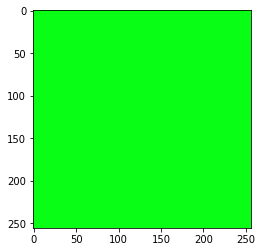

In [4]:
fg_img = cv2.imread("fg.jpg")
bg_img = cv2.imread("bg.jpg")
color = dominant_color(fg_img)
clr_img = np.zeros([256, 256, 3])
clr_img[:] = color
plt.imshow(clr_img.astype(np.uint8)); plt.show()

[  8 255  21]


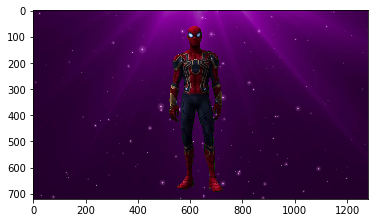

In [5]:
merged = merge_fg_bg(fg_img, bg_img)
to_show = cv2.cvtColor(merged, cv2.COLOR_BGR2RGB)
plt.imshow(to_show); plt.show()

In [6]:
fgs = ["fg.jpg", "fg_2.jpg", "fg_3.jpeg", "fg_4.jpg"]
bgs = ["bg.jpg", "bg_2.jpeg", "bg_3.jpeg", "bg_4.jpeg"]

[  8 255  21]


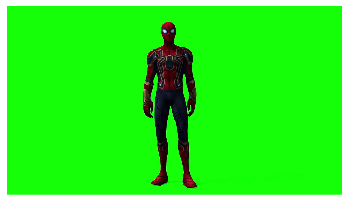

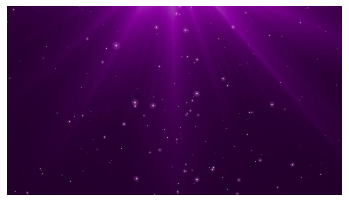

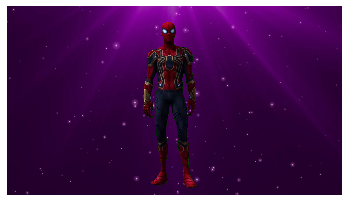

[214   0   4]


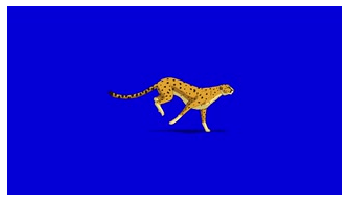

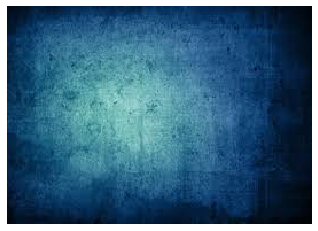

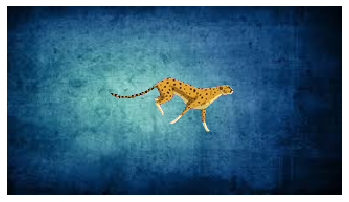

[  2 255   1]


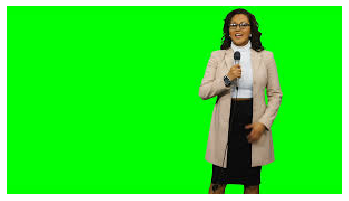

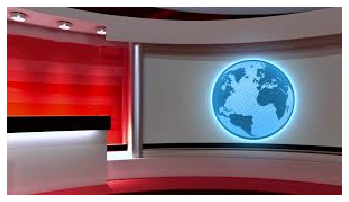

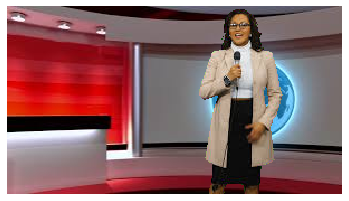

[254  55   0]


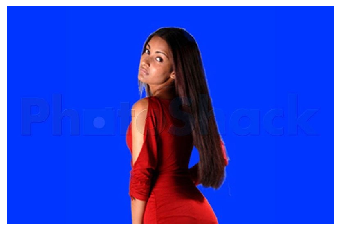

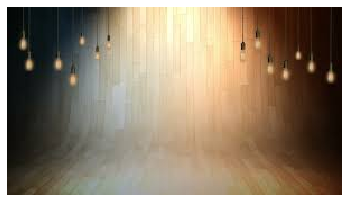

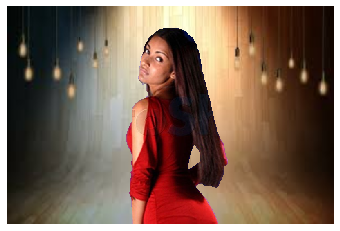

In [7]:
for fg, bg in zip(fgs, bgs):
    f_img = cv2.imread(fg)
    b_img = cv2.imread(bg)
    merged = merge_fg_bg(f_img, b_img)
    pts = [f_img, b_img, merged]
    for i, img in enumerate(pts):
        plt.axis("off")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()